In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 20
})

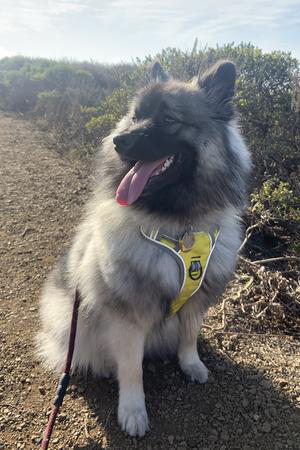

In [2]:
path = '../images/momo_original.jpg'
img  = Image.open(path)  
img

In [3]:
import matplotlib.pyplot as plt
arr = np.array(img) 
print(arr.shape)
X = arr.reshape(arr.shape[0]*arr.shape[1],arr.shape[2])
print(X.shape)

(450, 300, 3)
(135000, 3)


In [4]:
N,_ = X.shape
N

135000

In [5]:
def initialize_means(X, K=5):
    rand_idx = np.random.choice(N, 1, replace=False)
    means = X[rand_idx, :]
    
    for i in range(1, K):
        sq_dist = np.sum((X[:, None, :]- means[None, :, :])**2, axis = -1)
        min_sq_dist = np.min(sq_dist, axis = 1)
        prob = min_sq_dist / np.sum(min_sq_dist)
        rand_idx = np.random.choice(N, 1, p = prob, replace=False)
        mean_next = X[rand_idx, :]
        means = np.append(means, mean_next, axis = 0)
        
    return means


def kmeans_pp(X, K=5, iterations = 10):
    N,_ = X.shape
    
    # Initalize means
    means = initialize_means(X, K=K)

    for _ in range(iterations):
        dist = np.sum((X[:,None, :]- means[None,:,:])**2, axis = -1)
        nearest_cluster_idx = np.argmin(dist, axis = 1)

        means = np.zeros((K,3))
        for cluster_j in range(K):
            means[cluster_j,:] = np.mean(X[nearest_cluster_idx==cluster_j,:], axis = 0)

    nearest_cluster_idx

    Xc = np.zeros((N, 3))
    for cluster_j in range(K):
        Xc[nearest_cluster_idx == cluster_j,:] = means[cluster_j, :]

    return Xc, means, nearest_cluster_idx


In [6]:
imgc_list = []
k_list = [2,5,10]
title_list = []
for k in k_list:
    Xc, _, _ = kmeans_pp(X, K = k)
    Xc = Xc.reshape(*arr.shape).astype(dtype='uint8')
    imgc = Image.fromarray(Xc, 'RGB')
    imgc_list.append(imgc)
    title_list.append(rf'$K={k}$')
imgc_list.append(img)
title_list.append('original')

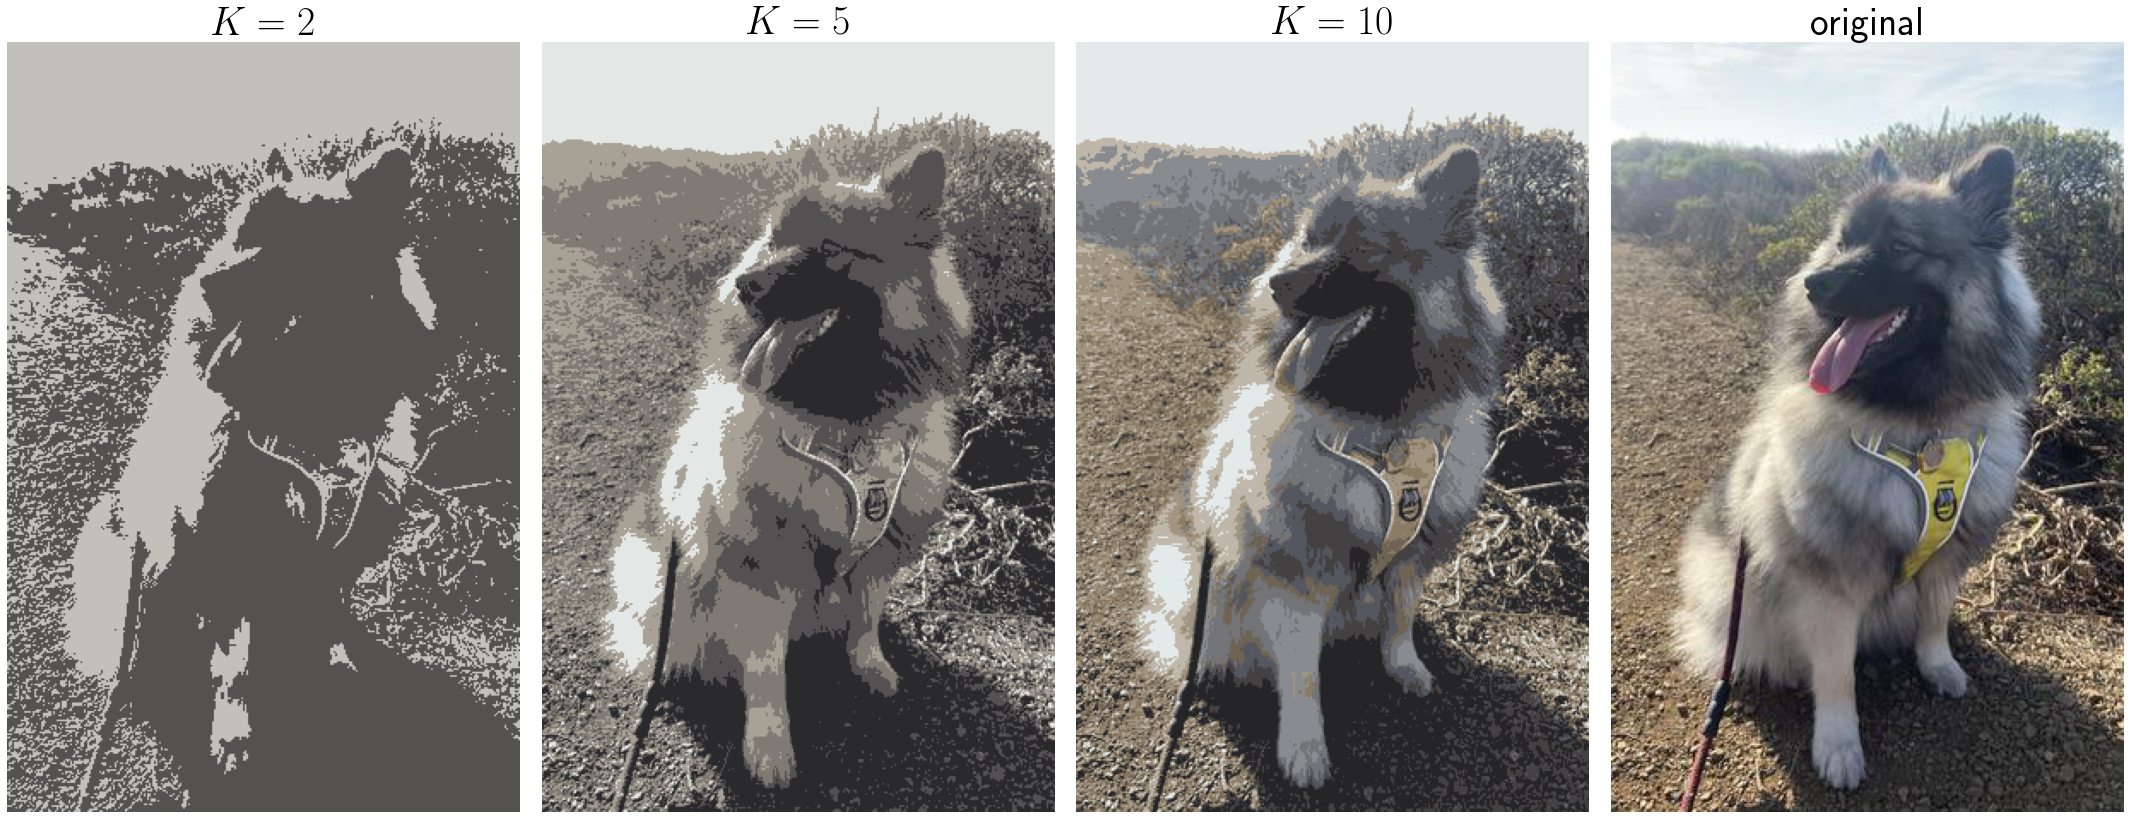

In [7]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,len(imgc_list), figsize=(30,30))
for i, imgc in enumerate(imgc_list):
    ax[i].imshow(imgc)
    ax[i].axis('off')
    ax[i].set_title(title_list[i],fontsize=40)

plt.tight_layout()
plt.show() 
#fig.savefig("images/kmeans.png", format="png", bbox_inches='tight') 